In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [7]:
with open("data/sin/sin.pickle", "rb") as f:
    sin_data = pickle.load(f)

In [8]:
def prepare_data(x_window, y_window):
    input_price = x_window[:, 0]
    input_price_diff = np.diff(input_price)
    input_price_diff_std = input_price_diff.std()
    input_price_diff_normalized = input_price_diff / input_price_diff_std

    input_volume = x_window[:, 1]
    input_volume_diff = np.diff(input_volume)
    input_volume_normalized = input_volume_diff / input_volume_diff.std()

    output_price = y_window[:, 0]
    output_price_diff = np.diff(output_price)
    output_price_diff_normalized = output_price_diff / input_price_diff_std


    input_data = np.column_stack([input_price_diff_normalized, input_volume_normalized])

    return input_data, output_price_diff_normalized

In [9]:
preprocessed_data = {"X":[],
                     "Y":[]}

for i in range(sin_data.shape[0] - 106):
    x, y = prepare_data(sin_data[i:i+101], sin_data[i+100:i+106])
    preprocessed_data["X"].append(x)
    preprocessed_data["Y"].append(y)

with open("data/sin/sin_preprocessed.pickle", "wb") as f:
    pickle.dump(preprocessed_data, f)

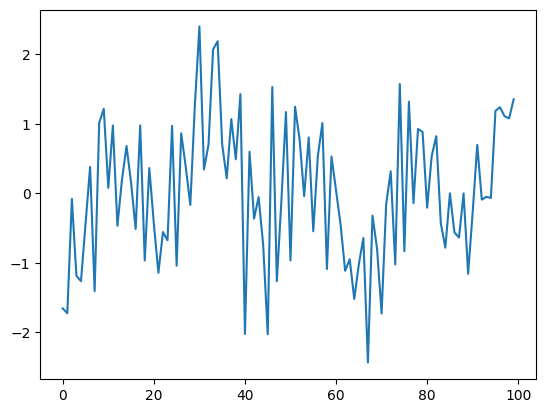

In [10]:
plt.plot(preprocessed_data["X"][100][:, 0])